In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectPercentile, f_regression


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("AmesHousing.csv")

In [4]:
# 2. Tiền xử lý dữ liệu (Cơ bản)
# Chỉ lấy các cột số (loại bỏ text để tránh lỗi ở bước cơ bản)
numeric_cols = df.select_dtypes(include=[np.number])

# Xử lý giá trị thiếu: Điền bằng trung bình cộng (Mean)
numeric_cols = numeric_cols.fillna(numeric_cols.mean())

# Tách biến đầu vào (X) và biến mục tiêu (y - SalePrice)
X = numeric_cols.drop(columns=['SalePrice'])
y = numeric_cols['SalePrice']
y_log = np.log1p(y)
# 3. Chia tập dữ liệu (80% học, 20% thi)
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
# 4. Khởi tạo và Huấn luyện mô hình
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)

# 6. Đánh giá hiệu quả
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Sai số tuyệt đối trung bình (MAE): {mae:,.2f}")
print(f"Căn bậc hai sai số toàn phương (RMSE): {rmse:,.2f}")
print(f"Độ phù hợp (R2 Score): {r2:.4f}")

Sai số tuyệt đối trung bình (MAE): 0.09
Căn bậc hai sai số toàn phương (RMSE): 0.13
Độ phù hợp (R2 Score): 0.9043


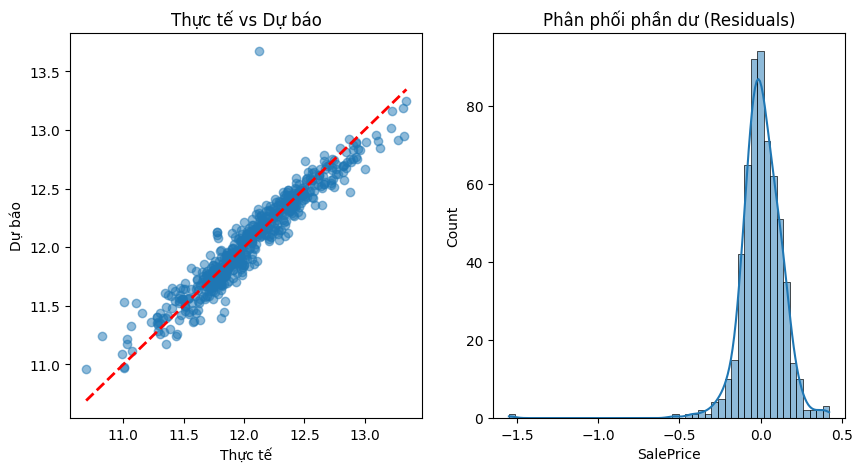

In [5]:
# [PHẦN BỔ SUNG CHO LINEAR REGRESSION]: Kiểm tra các giả định
# Linear Regression cần kiểm tra xem phần dư (Residuals) có phân phối chuẩn không
residuals = y_test - y_pred

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Thực tế')
plt.ylabel('Dự báo')
plt.title('Thực tế vs Dự báo')

plt.subplot(1,2,2)
sns.histplot(residuals, kde=True)
plt.title('Phân phối phần dư (Residuals)')
plt.show()